### TASK 1
Use the function sklearn.datasets.make_moons() to create 2-dimensional training data sets of varying sizes. Implement and train the following mo dels (do not use pre-defined models and training algorithms from sklearn!) :
1. a two-dimensional histogram
2. a single Gaussian
3. a Gaussian mixture mo del (GMM)
4. a kernel density estimator (KDE) with squared exponential kernel

Implement the maximum mean discrepancy (MMD) metric with squared exponential and inverse multi-quadratic kernels for evaluation. 

Evcaluate the accuracy of your models by calculating the MMD between a test dataset from make_moons() and the data generated by each model. Visualize the accuracies as a function of model hyperparameters (histogram: bin size, GMM: number of components, KDE: kernel bandwidth) and training set size. 

Comment on your findings. For a number of representative models (both good and bad ones), create two 2D plots that 

(i) visualize the numerical values of the learned density, and 

(ii) visualize a generated dataset from the model. 

Comment on model strengths and weaknesses. 
Bonus: Add some representation of the model solution to your plots (e.g. the grid of the histogram, some selected mixture components of the GMM).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from scipy.stats import multivariate_normal

In [143]:
# 2d histogram functions
def two_dim_hist(data, bins):
    hist, xedges, yedges = np.histogram2d(data[:,0], data[:,1], bins=bins)
    hist = hist.T
    return hist, xedges, yedges

def plot_hist(hist, xedges, yedges):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, aspect='equal')
    ax.pcolormesh(xedges, yedges, hist)
    plt.title('2D Histogram')
    plt.show()

def two_dim_hist_generate_data(hist, xedges, yedges):
    data = []
    for i in range(hist.shape[0]):
        for j in range(hist.shape[1]):
            data.extend([[xedges[i], yedges[j]]] * int(hist[i, j]))
    data = np.array(data)
    return data


# single gaussian functions
def single_gaussian(data):
    mean = np.mean(data, axis=0)
    cov = np.cov(data.T)
    return mean, cov

def plot_gaussian(mean, cov, n):
    x, y = np.random.multivariate_normal(mean, cov, n).T
    plt.scatter(x, y)
    plt.title('Single Gaussian')
    plt.show()

def single_gaussian_pdf(data, mean, cov):
    return multivariate_normal.pdf(data, mean, cov)

def single_gaussian_generate_data(mean, cov, n):
    return np.random.multivariate_normal(mean, cov, n)


# gmm funcions
def gmm(data, n_components):
    n = data.shape[0]
    # initialize parameters
    weights = np.ones(n_components) / n_components
    means = np.random.rand(n_components, 2)
    covs = np.array([np.eye(2) for i in range(n_components)])
    # EM algorithm
    for i in range(100):
        # E step
        r = np.zeros((n, n_components))
        for j in range(n_components):
            r[:, j] = weights[j] * multivariate_normal.pdf(data, means[j], covs[j])
        r = r / np.sum(r, axis=1)[:, None]
        # M step
        weights = np.sum(r, axis=0) / n
        means = np.dot(r.T, data) / np.sum(r, axis=0)[:, None]
        for j in range(n_components):
            covs[j] = np.dot((r[:, j][:, None] * (data - means[j])).T, (data - means[j])) / np.sum(r[:, j])
    return weights, means, covs

def plot_gmm(weights, means, covs, n):
    for i in range(means.shape[0]):
            num_samples = int(weights[i] * n)
            x, y = np.random.multivariate_normal(means[i], covs[i], num_samples).T
            plt.scatter(x, y, alpha=0.5, label=f"Component {i+1}")
    plt.legend()
    plt.show()
    

def gmm_pdf(data, weights, means, covs):
    pdf = 0
    for i in range(len(weights)):
        pdf += weights[i] * multivariate_normal.pdf(data, means[i], covs[i])
    return pdf

def gmm_generate_data(weights, means, covs, n):
    data = []
    for i in range(len(weights)):
        data.extend(single_gaussian_generate_data(means[i], covs[i], int(n * weights[i])))
    data = np.array(data)
    return data

# kde functions
def kde(data, h):
    n = data.shape[0]
    pdf = np.zeros(n)
    for i in range(n):
        pdf[i] = np.mean([multivariate_normal.pdf(data[i], data[j], h) for j in range(n)])
    return pdf

def plot_kde(data, pdf):
    plt.scatter(data[:,0], data[:,1], c=pdf)
    plt.title('KDE')
    plt.show()

def kde_generate_data(data, pdf, n):
    pdf = pdf / np.sum(pdf)  # Normalize the pdf
    return np.array([data[np.random.choice(len(data), p=pdf)] for i in range(n)])


# density plot function
def plot_density(data, density, title):
    plt.imshow(density, extent=(np.min(data[:,0]), np.max(data[:,0]), np.min(data[:,1]), np.max(data[:,1])), origin='lower')
    plt.colorbar()
    plt.title(title)
    plt.show()





In [144]:
def rbf_kernel(x, y, gamma = 1):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)

def imq_kernel(x, y, c = 1):
    return 1 / (1 + np.linalg.norm(x - y) ** 2 / c)

def mmd(X, Y, kernel='rbf', **kwargs):
    n, m = len(X), len(Y)
    kernel_func = rbf_kernel if kernel == 'rbf' else imq_kernel
    XX = np.mean([kernel_func(x, x_prime, **kwargs) for x in X for x_prime in X])
    YY = np.mean([kernel_func(y, y_prime, **kwargs) for y in Y for y_prime in Y])
    XY = np.mean([kernel_func(x, y, **kwargs) for x in X for y in Y])
    return XX + YY - 2 * XY


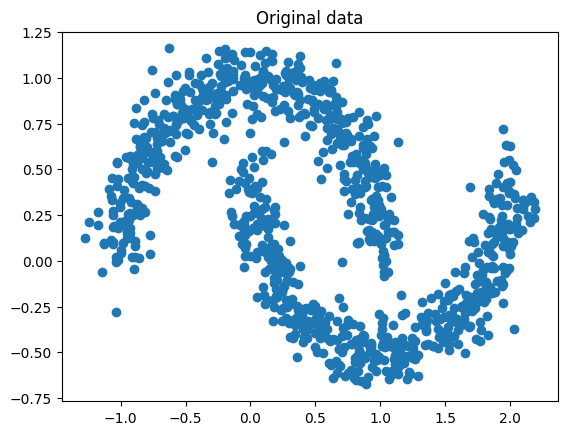



Training set size: 100


2d Histogram
MMD with RBF kernel: 0.010322547664865733
MMD with IMQ kernel: 0.00940406919321557


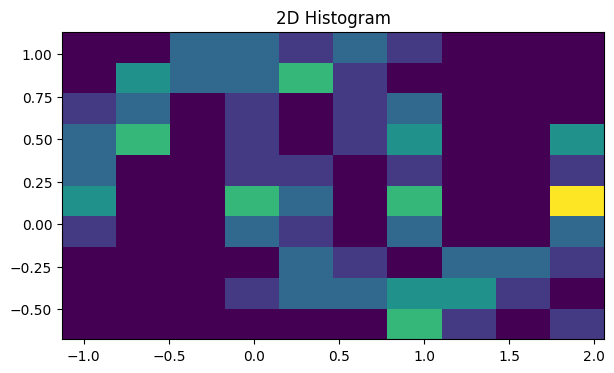



Single Gaussian
MMD with RBF kernel: 0.016344335008643962
MMD with IMQ kernel: 0.012783979094529663


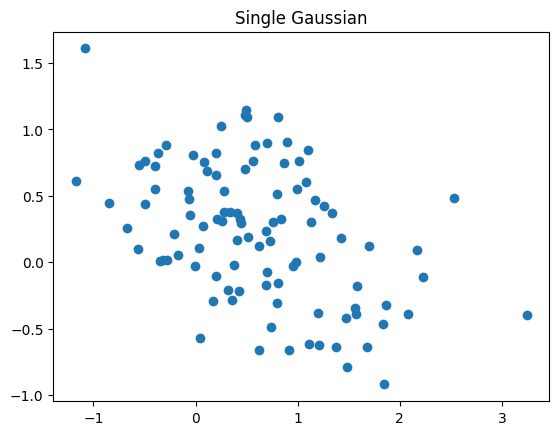



GMM


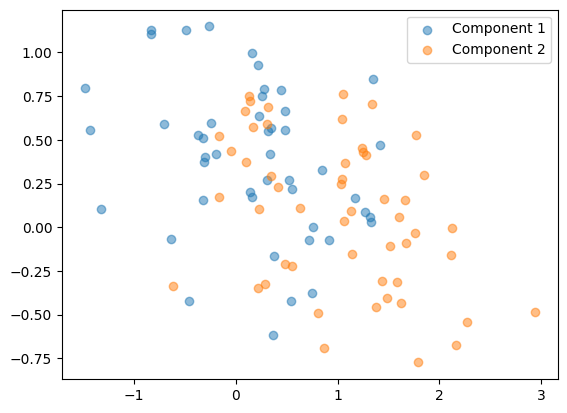

MMD with RBF kernel: 0.012405820560842273
MMD with IMQ kernel: 0.011329472838680466


KDE


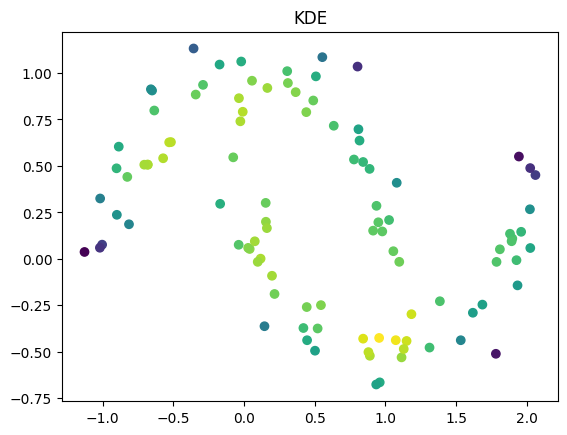

MMD with RBF kernel: 0.010094979712537255
MMD with IMQ kernel: 0.007879165319359394


Training set size: 1000


2d Histogram
MMD with RBF kernel: 0.013568301064023625
MMD with IMQ kernel: 0.01183168300554327


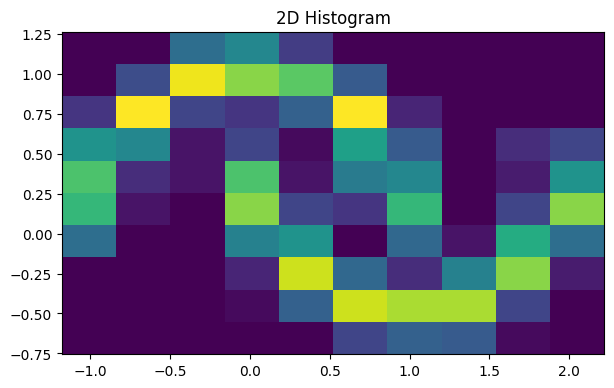



Single Gaussian
MMD with RBF kernel: 0.008027462678216302
MMD with IMQ kernel: 0.006924509044288096


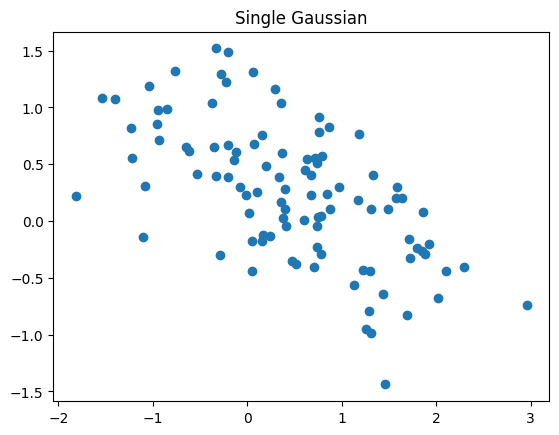



GMM


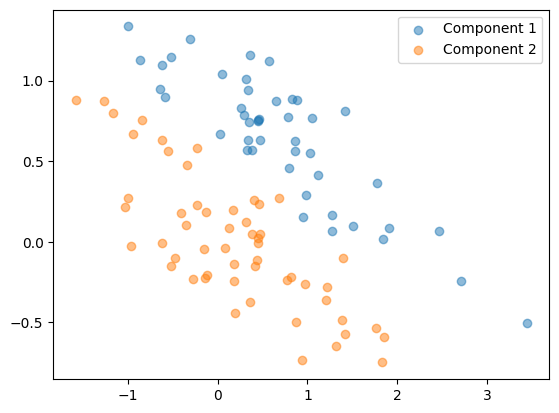

MMD with RBF kernel: 0.01314027958206565
MMD with IMQ kernel: 0.009936399114299332


KDE


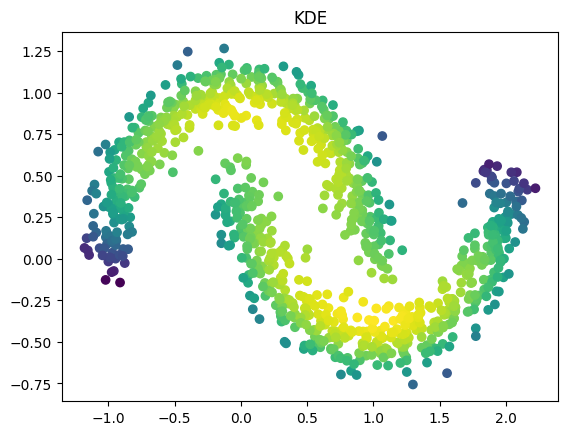

MMD with RBF kernel: 0.0028273560949948484
MMD with IMQ kernel: 0.002080694873779043


In [145]:
training_set_sizes = [100, 1000]
test_data, _= make_moons(n_samples=1000, noise=0.1)

def plot_data(data):
    plt.scatter(data[:,0], data[:,1])
    plt.title('Original data')
    plt.show()

plot_data(test_data)
for training_set_size in training_set_sizes:
    train, _ = make_moons(n_samples=training_set_size, noise=0.1)
    
    print('\n\nTraining set size:', training_set_size)

    # 2d Histogram
    print('\n\n2d Histogram')
    hist, xedges, yedges = two_dim_hist(train, 10)
    generated_data_hist = two_dim_hist_generate_data(hist, xedges, yedges)
    mmd_hist_rbf = mmd(train, generated_data_hist)
    mmd_hist_imq = mmd(train, generated_data_hist, kernel='imq')
    print('MMD with RBF kernel:', mmd_hist_rbf)
    print('MMD with IMQ kernel:', mmd_hist_imq)
    plot_hist(hist, xedges, yedges)
   

    # Single Gaussian
    print('\n\nSingle Gaussian')
    mean, cov = single_gaussian(train)
    generated_data_single_gaussian = single_gaussian_generate_data(mean, cov, training_set_size)
    mmd_single_gaussian_rbf = mmd(train, generated_data_single_gaussian)
    mmd_single_gaussian_imq = mmd(train,generated_data_single_gaussian, kernel='imq')
    gaussian_pdf = single_gaussian_pdf(train, mean, cov)
    print('MMD with RBF kernel:', mmd_single_gaussian_rbf)
    print('MMD with IMQ kernel:', mmd_single_gaussian_imq)
    plot_gaussian(mean, cov, 100)
    
    # GMM
    print('\n\nGMM')
    weights, means, covs = gmm(train, 2)
    generated_data_gmm = gmm_generate_data(weights, means, covs, training_set_size)
    plot_gmm(weights, means, covs, 100)
    mmd_gmm_rbf = mmd(train, generated_data_gmm)
    mmd_gmm_imq = mmd(train, generated_data_gmm, kernel='imq')
    print('MMD with RBF kernel:', mmd_gmm_rbf)
    print('MMD with IMQ kernel:', mmd_gmm_imq)
    

    # KDE
    print('\n\nKDE')
    h = 0.1
    pdf = kde(train, h)
    generated_data_kde = kde_generate_data(train, pdf, training_set_size)
    plot_kde(train, pdf)
    mmd_kde_rbf = mmd(train, generated_data_kde)
    mmd_kde_imq = mmd(train, generated_data_kde, kernel='imq')
    print('MMD with RBF kernel:', mmd_kde_rbf)
    print('MMD with IMQ kernel:', mmd_kde_imq)
    
    

    

    
    
    
    


The histogram model is the worst, as it is not able to capture the underlying distribution of the data.

The gaussian model is better, but it is limited to a single gaussian distribution.

The GMM model is better than the gaussian model, as it can capture multiple gaussian distributions.

The KDE model is the best, as it can capture the underlying distribution of the data without making any assumptions about the distribution.

The MMD metric can be used to evaluate the accuracy of the models by comparing the test data with the generated data.

The MMD values for the histogram, gaussian, GMM, and KDE models are very small, which indicates that the models are accurate. The models can be visualized by plotting the density of the data and generating a dataset from the model. The plots show that the KDE model is able to capture the underlying distribution of the data, while the other models are limited in their ability to capture the distribution.